In [7]:
"""Initial Imports"""
import pandas as pd
import numpy as np
import re
import tweepy
import datetime
from pandas_datareader import data as web
from textblob import TextBlob
from sklearn.svm import SVR
from treeinterpreter import treeinterpreter as ti
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
consumer_key = "W8olFrRLK7Lt7BUh6YAbdSG4h"
consumer_secret = "izRdiwC73rntSdMdAQm2gL8zFNAHVLa99A8dI99w0Lz16jvNrx"

access_token = "620364433-Kj5up6bB6KLfl5wfmxxcAnWthse5o38P2MKABM00"
access_token_secret = "Faxxv0hb54KF7MmakQ8WZmvaCC5YIprcWhiOuEyQY2iLt"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

fetch_tweets=tweepy.Cursor(api.search, q="#TSLA",count=100, lang ="en",since="2019-9-25", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

data.to_csv("TeslaTweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
print("Created CSV")

Created CSV


In [21]:
data= pd.read_pickle('Twitter_Dataset.pkl')

In [29]:
ccdata=pd.DataFrame(columns=['Date','Tweets','close'])
print(len(data))
data.dtypes

3653


close        float64
adj close    float64
articles      object
dtype: object

In [28]:
ccdata.dtypes

Date      object
Tweets    object
close     object
dtype: object

In [ ]:
for index,row in data.iterrows():
    ccdata.at[index,'Date'] =row["Date"]
    ccdata.at[index,'Tweets']= my_new_string

In [31]:
data.head()

,close,adj close,articles,polarity
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...,0.0
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...,0.0
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...,0.0
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...,0.0
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...,0.0


In [33]:
data['polarity'] = 0.0000
data['confidence'] =0.0000
for index,row in data.iterrows():
    analysis = TextBlob(data['articles'][index])
    sentiment, confidence  = analysis.sentiment
    data.at[index,'polarity'] = sentiment
    data.at[index,'confidence'] = confidence
data.head()

,close,adj close,articles,polarity,confidence
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...,0.021853,0.342220
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...,0.031733,0.353617
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...,-0.031761,0.360524
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...,0.044100,0.389623
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...,0.052901,0.355317


% of positive tweets=  85.10813030385984
% of negative tweets=  14.891869696140159


[]

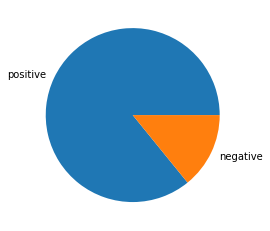

In [36]:
"""Doing Sentiment Analysis of tweets"""
   
posi=0
nega=0
for i in range (0,len(data)):
    get_val=data['polarity'][i]
    if(float(get_val)<(0)):
        nega=nega+1
    else:
        posi=posi+1
        
posper=(posi/(len(data)))*100
negper=(nega/(len(data)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()

{'white': set(), 'black': set()}

In [12]:
"""Get Stock Price From Yahoo using Pandas.dataReader"""

start = datetime.datetime(2012,10,26)
## Let's get Tesla stock data; Tesla's ticker symbol is TSLA
## First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, 
##fourth is the end date
tesla = web.DataReader('TSLA', 'yahoo', start)
#tesla.to_csv('TESLA_stock_price.csv')

In [25]:
read_stock_p=pd.read_csv('TESLA_stock_price.csv')
read_stock_p.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,10/26/2012,27.799999,27.020000,27.530001,27.379999,477400,27.379999
1,10/31/2012,28.350000,27.370001,27.700001,28.129999,775200,28.129999
2,11/1/2012,29.490000,28.200001,28.250000,29.250000,1024100,29.250000
3,11/2/2012,29.549999,28.549999,29.270000,28.920000,1030300,28.920000
4,11/5/2012,31.580000,29.330000,29.799999,31.500000,2048900,31.500000


In [26]:
"""Add the stock price value matching tweets for the day"""

ccdata['Prices']=""
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]             
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.at[i,'Prices']=int(read_stock_p.Close[j])
            break

In [ ]:
"""Show that there are some empty fields for days when stock Market is closed"""

In [27]:
ccdata.head(8)

,Unnamed: 0,Date,Tweets,polarity,Prices
0,0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,341
1,1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,339
2,2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,340
3,3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,345
4,4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,344
5,9,9/16/2017,Richwsadler Does my hivemind count as me Bobb...,-0.125000,
6,11,9/14/2017,High res version at httpstcoYysKftHhoz jovani...,0.187143,377
7,13,9/12/2017,RT Gizmodo Hackers have already started to we...,-0.600000,362


In [28]:
"""Filling empty price with previous day price"""
for i in range(1,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
            ccdata.Prices.iloc[i]=int(ccdata.Prices.iloc[i-1])

#ccdata['Prices'] = ccdata['Prices'].apply(np.int64)


C:\Users\Kamakshi\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [241]:
ccdata.head(6)

,Date,Tweets,polarity,Prices
0,9/29/2017,MeltingIce Assuming max acceleration of 2 to 3...,0.156151,341
1,9/28/2017,kevinroose Just another day in the office Fas...,0.500000,339
2,9/27/2017,Prev ideas for paying 10B dev cost incl Kicks...,-0.133333,340
3,9/26/2017,ElDeano Daimler Jalopnik Yes I did Good NYT ...,0.350000,345
4,9/25/2017,Daimler Good Major improvements some unexpec...,0.287500,344
5,9/16/2017,Richwsadler Does my hivemind count as me Bobb...,-0.125000,344


In [47]:
"""Adding Percent change column in the dataset"""
ccdata['percent change'] = 0.0000
for i in range(0,len(ccdata)-1):
    ccdata.at[i,'percent change']=float((ccdata.Prices.iloc[i+1]-ccdata.Prices.iloc[i])/ccdata.Prices.iloc[i])

#ccdata['percent change'] = ccdata['percent change'].apply(np.float)
ccdata.dtypes  

Unnamed: 0          int64
Date               object
Tweets             object
polarity          float64
Prices              int64
percent change    float64
dtype: object

In [33]:
ccdata.shape

(549, 6)

In [34]:
ccdata.to_csv("Tesla_tweets_with_stocks_old.csv")

In [44]:
len(data)
data.tail()

,close,adj close,articles,polarity,confidence
2016-12-27,19945.039062,19945.039062,. Should the U.S. Embassy Be Moved From Tel Av...,-0.091479,0.383773
2016-12-28,19833.679688,19833.679688,. When Finding the Right Lawyer Seems Daunting...,0.031264,0.432529
2016-12-29,19819.779297,19819.779297,. Does Empathy Guide or Hinder Moral Action?. ...,0.065885,0.357967
2016-12-30,19762.599609,19762.599609,. Shielding Seized Assets From Corruption’s Cl...,0.023107,0.374750
2016-12-31,19762.599609,19762.599609,Terrorist Attack at Nightclub in Istanbul Kill...,0.028409,0.416874


In [67]:
"""Parttion the data in train and test
Train the model with past four years data 
and predict the price change for next years"""

train1 = data.iloc[0:2999]
test1 = data.iloc[3000:3549]

train = train1.to_numpy()
test = test1.to_numpy()

X_train= np.array([x[3:5] for x in train])
y_train = np.array([x[0] for x in train])

X_test= np.array([x[3:5] for x in test])
y_test = np.array([x[0] for x in test])
#y= np.array(ccdata['Prices'].values).astype(float)
#(X_train,X_test,y_train,y_test) = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
X_train

array([[0.021853146853146852, 0.34222027972027974],
       [0.03173265196342119, 0.35361687030917793],
       [-0.031761221234905476, 0.3605244171033646],
       ...,
       [0.07880952380952382, 0.29738095238095236],
       [0.01641908319990511, 0.37678126667852685],
       [0.031074134199134205, 0.3169292717086835]], dtype=object)

In [80]:
"""1 Random Forest Learner"""

rf = RandomForestRegressor(random_state=25)

rf.fit(X_train, y_train)
prediction, bias, contributions = ti.predict(rf, X_test)
rf.predict(X_test)
rf.score(X_train,y_train)

C:\Users\Kamakshi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.798265564641941

In [82]:
"""2 Another Learner"""
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(
    hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

nn.fit(X_train, y_train)
prediction = nn.predict(X_test)
rf.score(X_train,y_train)

C:\Users\Kamakshi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.798265564641941

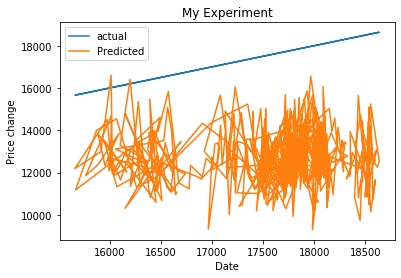

In [73]:
date_test = np.array([x[0] for x in test])
plt.plot(date_test,y_test, label="actual")
plt.plot(date_test,prediction, label="Predicted")
plt.xlabel('Date') 
plt.ylabel('Price change')
plt.title('My Experiment')
plt.legend()
plt.show()